In [1]:
import pandas as pd
import numpy as np
import copy, math
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier , export_text
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import statistics

In [2]:
#1
data = pd.read_csv("drug.csv")
for column in data.columns:
    if data[column].dtype == 'object':
        print(column , "has number of missing values = ",data[column].isnull().sum())
        # handle miss values in categorical value by Imputation mode / most frequent 
        mode_value = data[column].mode()[0]
        data[column].fillna(mode_value, inplace=True)
        # encode categorical values 
        label_encoder = LabelEncoder()
        data[column] = label_encoder.fit_transform(data[column])
        # let`s check if the null value disappeared or not 
        print(column , "has number of missing values = ",data[column].isnull().sum())
    else:
        # numerical values 
        # perform Imputation mean to handle miss values
        print(column , "has number of missing values = ",data[column].isnull().sum())
        mean_value = data[column].mean()
        data[column].fillna(mean_value, inplace=True)
        # let`s check if the null value disappeared or not 
        print(column , "has number of missing values = ",data[column].isnull().sum())

Age has number of missing values =  0
Age has number of missing values =  0
Sex has number of missing values =  0
Sex has number of missing values =  0
BP has number of missing values =  2
BP has number of missing values =  0
Cholesterol has number of missing values =  2
Cholesterol has number of missing values =  0
Na_to_K has number of missing values =  1
Na_to_K has number of missing values =  0
Drug has number of missing values =  0
Drug has number of missing values =  0


In [3]:
best_accuracy = 0
best_random_state = 0
best_model = None
features = data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
target = data['Drug']
# 0 - 40 with step 10
random_state = np.arange(0,41,10)
print(random_state)
# 0 - 10 - 20 - 30 - 40
for i in random_state:
    train_data, test_data, train_labels, test_labels = train_test_split(
        features,
        target,
        test_size=0.3, 
        random_state=i  # Use a different random seed for each iteration
    )
    model = DecisionTreeClassifier()
    model.fit(train_data, train_labels)
    predictions = model.predict(test_data)
    accuracy = accuracy_score(test_labels, predictions)
    if accuracy >= best_accuracy:
        best_accuracy = accuracy
        best_random_state = i
        best_model = model
    print(f"Random State: {i}  | Accuracy: {accuracy}")
print("\nBest Performing Model:")
print(f"Random State: {best_random_state} | Best Accuracy: {best_accuracy}")

[ 0 10 20 30 40]
Random State: 0  | Accuracy: 1.0
Random State: 10  | Accuracy: 0.9666666666666667
Random State: 20  | Accuracy: 0.9833333333333333
Random State: 30  | Accuracy: 0.9833333333333333
Random State: 40  | Accuracy: 1.0

Best Performing Model:
Random State: 40 | Best Accuracy: 1.0


In [4]:
accuracies = []
tree_sizes = []
test_acc = []
t_size = []
best_accuracy = 0
best_random_state = 0
best_Split_Ratios = 0
best_accuracy_for_each_Split_Ratios = 0
best_random_state_for_each_Split_Ratios = 0;
features = data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
target = data['Drug']
# split ration 30 - 70 with step 10
Split_Ratios = np.arange(30,71,10)
Split_Ratios = Split_Ratios/100
random_state = np.arange(10,51,10)
# 30 - 40 - 50 - 60 - 70
for i in Split_Ratios:
    # 10 - 20 - 30 - 40 - 50
    for j in random_state:
        train_data, test_data, train_labels, test_labels = train_test_split(
            features, target, train_size=i)
        model = DecisionTreeClassifier(random_state=j)
        model.fit(train_data, train_labels)
        predictions = model.predict(test_data)
        accuracy = accuracy_score(test_labels, predictions)
        tree_size = model.tree_.node_count
        tree_sizes.append(tree_size)
        if(accuracy > best_accuracy_for_each_Split_Ratios):
            best_random_state_for_each_Split_Ratios = j
            best_accuracy_for_each_Split_Ratios = accuracy
            if(accuracy > best_accuracy):
                best_accuracy = accuracy
                best_random_state = j
                best_Split_Ratios = i
        accuracies.append(accuracy)
    test_acc.append(statistics.fmean(accuracies))
    t_size.append(int(statistics.fmean(tree_sizes)))
    print(f"for Split Ratios {i} : minimum accuarcy = {min(accuracies)}, avrage accuracy = {statistics.fmean(accuracies)}, maximum accuracy = {max(accuracies)} at random state = {best_random_state_for_each_Split_Ratios}")
    print(f"for Split Ratios {i} : minimum tree size = {min(tree_sizes)}, avrage tree size = {int(statistics.fmean(tree_sizes))}, maximum tree size = {max(tree_sizes)}")
    tree_sizes = []
    accuracies = []
    best_accuracy_for_each_Split_Ratios = 0;
    best_random_state_for_each_Split_Ratios = 0;
print(f"best accuracy = {best_accuracy}, best random state = {best_random_state}, best Split Ratios = {best_Split_Ratios}")
print(Split_Ratios)
print(test_acc)
print(t_size)


for Split Ratios 0.3 : minimum accuarcy = 0.8428571428571429, avrage accuracy = 0.9457142857142857, maximum accuracy = 0.9857142857142858 at random state = 50
for Split Ratios 0.3 : minimum tree size = 11, avrage tree size = 12, maximum tree size = 15
for Split Ratios 0.4 : minimum accuarcy = 0.975, avrage accuracy = 0.9833333333333334, maximum accuracy = 0.9916666666666667 at random state = 10
for Split Ratios 0.4 : minimum tree size = 11, avrage tree size = 13, maximum tree size = 15
for Split Ratios 0.5 : minimum accuarcy = 0.96, avrage accuracy = 0.978, maximum accuracy = 1.0 at random state = 20
for Split Ratios 0.5 : minimum tree size = 15, avrage tree size = 15, maximum tree size = 17
for Split Ratios 0.6 : minimum accuarcy = 0.9375, avrage accuracy = 0.975, maximum accuracy = 1.0 at random state = 10
for Split Ratios 0.6 : minimum tree size = 11, avrage tree size = 12, maximum tree size = 15
for Split Ratios 0.7 : minimum accuarcy = 0.9666666666666667, avrage accuracy = 0.97666

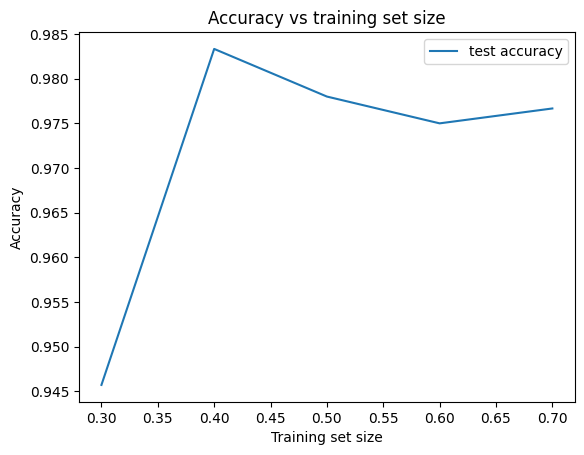

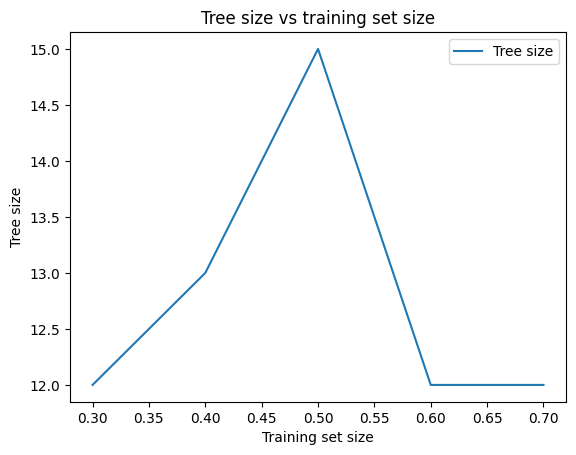

In [5]:
plt.figure()
plt.plot(Split_Ratios, test_acc, label='test accuracy')
plt.title('Accuracy vs training set size')
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the tree size against training set size
plt.figure()
plt.plot(Split_Ratios, t_size, label='Tree size')
plt.title('Tree size vs training set size')
plt.xlabel('Training set size')
plt.ylabel('Tree size')
plt.legend()
plt.show()
